# Generalized Linear Models and Elastic Nets (GLMNET)

### Objectives

1. Plot various methods of determining best $\lambda$
2. Benchmark and compare GLMNET implementation against `scikit-learn` implementations

## Setup

In [29]:
import numpy as np
from sklearn.datasets import load_boston, load_diabetes
from sklearn.linear_model import coordinate_descent as cd

import matplotlib.pyplot as plt

import glmnet

boston = load_boston()
diabetes = load_diabetes()
X, y = boston['data'], boston['target']
X, y = diabetes['data'], diabetes['target']

lambdas = np.logspace(np.log10(1e-4), np.log10(35), 100)

## GLMNET examples

### Enet / Lasso

<IPython.core.display.Javascript object>


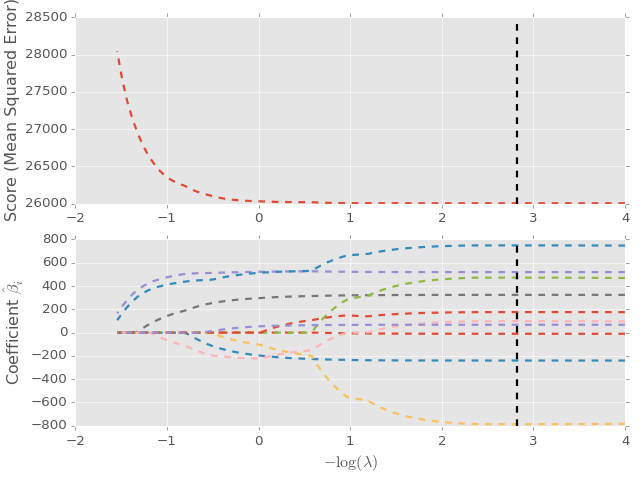

In [37]:
%matplotlib notebook

enet = glmnet.ElasticNet(lambdas=lambdas)
yhat = enet.fit(X, y).predict(X)

lasso = glmnet.Lasso(lambdas=lambdas)
yhat = lasso.fit(X, y).predict(X)

lasso.plot()

### Enet / Lasso with IC

<IPython.core.display.Javascript object>


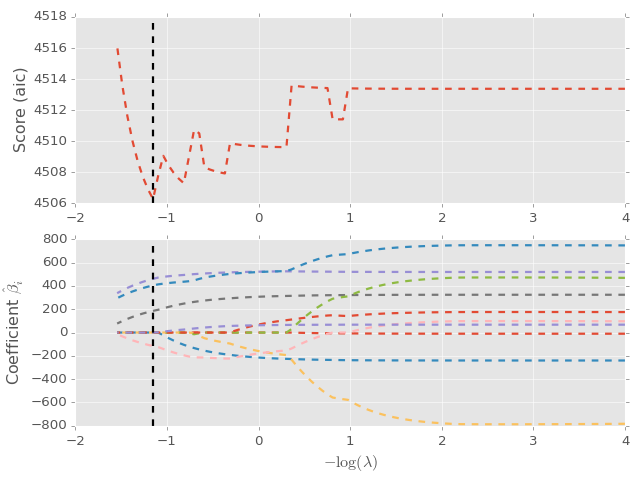

In [38]:
%matplotlib notebook
lassoAIC = glmnet.LassoIC(lambdas, criterion='AIC').fit(X, y)

lassoAIC.plot()

## Benchmarks

### No cross-validation

In [39]:
print('scikit-learn')
%timeit cd.Lasso(alpha=1.0).fit(X, y)
%timeit cd.Lasso(alpha=1.0).fit(X, y).predict(X)

print('glmnet')
%timeit glmnet.Lasso(lambdas=1.0).fit(X, y)
%timeit glmnet.Lasso(lambdas=1.0).fit(X, y).predict(X)

scikit-learn
1000 loops, best of 3: 211 µs per loop
1000 loops, best of 3: 245 µs per loop
glmnet
10000 loops, best of 3: 95.7 µs per loop
10000 loops, best of 3: 106 µs per loop


<IPython.core.display.Javascript object>


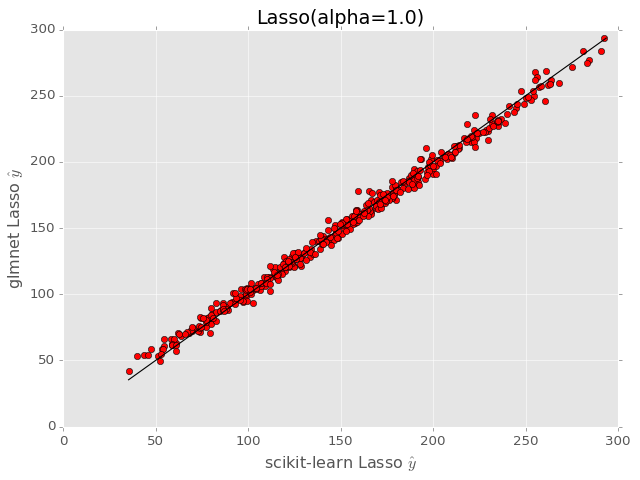

In [40]:
%matplotlib notebook

sklearn_yhat = cd.Lasso(alpha=1.0 / (2 * X.shape[0])).fit(X, y).predict(X)
glmnet_yhat = glmnet.Lasso(lambdas=1.0).fit(X, y).predict(X)

ax_min = min(sklearn_yhat.min(), glmnet_yhat.min())
ax_max = max(sklearn_yhat.max(), glmnet_yhat.max())

with plt.style.context('ggplot'):
    plt.plot(sklearn_yhat, glmnet_yhat, 'ro')
    plt.xlabel('scikit-learn Lasso $\hat{y}$')
    plt.ylabel('glmnet Lasso $\hat{y}$')
    plt.title('Lasso(alpha=1.0)')
    plt.plot([ax_min, ax_max], [ax_min, ax_max], 'k-')
    plt.tight_layout()

**TLDR**: Python wrapped Fortran `glmnet` code is 2-4.5x faster than `scikit-learn` and while the two differ, the results are very similar.